## __Applying Singular Value Decomposition (SVD)__ 

## Step 1: Import the Required Libraries and Create the Dataset

- Import **pandas** and **NumPy** libraries
- Create the **post_words** DataFrame


In [ ]:
import pandas as pd

c_names = ['post1', 'post2', 'post3', 'post4']
words = ['ice', 'snow', 'tahoe', 'goal', 'puck']
post_words = pd.DataFrame([[4, 4, 6, 2],
                           [6, 1, 0, 5],
                           [3, 0, 0, 5],
                           [0, 6, 5, 1],
                           [0, 4, 5, 0]],
                          index = words,
                          columns = c_names)
post_words.index.names = ['word:']
post_words

,post1,post2,post3,post4
word:,,,,
ice,4,4,6,2
snow,6,1,0,5
tahoe,3,0,0,5
goal,0,6,5,1
puck,0,4,5,0


__Observation:__
- Here, we can see the rows of the data.


## Step 2: Perform Singular Value Decomposition (SVD) on the Dataset

- Create the column space of the data, U, and the row space of the data, V
- Calculate the SVD using NumPy
- Display the V matrix


In [ ]:
import numpy as np

U, sigma, V = np.linalg.svd(post_words)
print(np.round(V, decimals=2))

[[-0.4  -0.57 -0.63 -0.35]
 [-0.6   0.33  0.41 -0.6 ]
 [ 0.6  -0.41  0.32 -0.61]
 [-0.34 -0.63  0.58  0.39]]


__Observation:__
- The diagonal values in **sigma** are always in descending order, and you can see that the vectors are also placed in that corresponding order.

In [ ]:
sigma

array([13.3221948 ,  9.2609512 ,  2.41918664,  1.37892883])

__Observation:__
- Here, we can see that the singular values in sigma have been created.

## Step 3: Approximate the Original Dataset Using the First Two Components

- Calculate the approximate dataset using the first two components
- Display the approximation and the error from the actual values





In [ ]:
A_approx = np.matrix(U[:, :2]) * np.diag(sigma[:2]) * np.matrix(V[:2, :])

print("A calculated using only the first two components:\n")
print(pd.DataFrame(A_approx, index=words, columns=c_names))

A calculated using only the first two components:

          post1     post2     post3     post4
ice    3.197084  4.818556  5.325736  2.792675
snow   5.619793  0.588201  0.384675  5.412204
tahoe  4.043943  0.071665 -0.123639  3.917015
goal   0.682117  5.089628  5.762122  0.336491
puck   0.129398  4.219523  4.799185 -0.143946


__Observation:__
- Here, A was calculated using only the first two components, and we got an approximate A by multiplying the matrix U and V.

In [ ]:
print("\nError from actual value:\n")
print(post_words - A_approx)


Error from actual value:

          post1     post2     post3     post4
word:                                        
ice    0.802916 -0.818556  0.674264 -0.792675
snow   0.380207  0.411799 -0.384675 -0.412204
tahoe -1.043943 -0.071665  0.123639  1.082985
goal  -0.682117  0.910372 -0.762122  0.663509
puck  -0.129398 -0.219523  0.200815  0.143946


__Observation:__
- Here, we can see the difference from the actual by the approximate value of A.

## Step 4: Visualize the V Matrix as an Image

- Import matplotlib.pyplot
- Plot the V matrix as an image
- Pass the c_names values to the xticks and the words to the yticks
- Initialize ax
- Declare the title as SVD
- Plot the colorbar


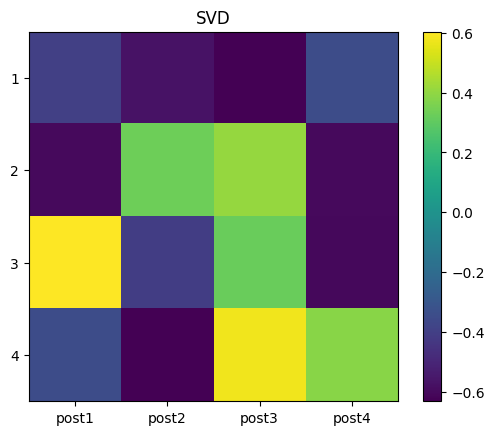

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(V, interpolation='none')
plt.xticks(range(len(c_names)))
plt.yticks(range(len(words)))
plt.ylim([len(words) - 1.5, -.5])
ax = plt.gca()
ax.set_xticklabels(c_names)
ax.set_yticklabels(range(1, len(words) + 1))
plt.title("SVD")
plt.colorbar();

__Observations:__
- Here, we can see the singular value decomposition plot.
- Notice that the lighter blue of post 1 and post 4 of row 1 have similar values.

## Step 5: Analyze the U Matrix

- Display the second column of the U matrix


In [ ]:
pd.DataFrame(U[:,1], index=words)

,0
ice,0.018526
snow,-0.678291
tahoe,-0.519801
goal,0.370263
puck,0.363717


__Observations:__
- Here, we can see that snow and tahoe are identical, whereas goal and puck have similar values.

__Conclusion__

This is how we can apply single value decomposition, or SVD.